# Project: Data Analysis of TMDb (The Movie Database) Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I will be analysing a dataset of about 10,000 movies from The Movie Database (TMDb). This dataset contains relevant information such as budget, revenue, genre, cast, director and runtime etc which will be useful for our analysis.

In particular I will be investigating the following questions: 
- **Research Question 1 :** What are the top profit-making movies?
- **Research Question 2:** Does the runtime of a movie affect its profit and popularity?
- **Research Question 3:** What are the months of the year that have the highest profits? Are there "good months" to release movies to maximise profits?
- **Research Question 4** - What are the top genres/cast/director and other traits for the most popular movies?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [1]:
# Load the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
%matplotlib inline
sns.set()

In [2]:
# Load the dataset.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Check the dimensions of the dataframe. The results show that there are 10866 rows and 21 columns.
df.shape

(10866, 21)

In [4]:
# Use df.info() to look for instances of missing or incorrect datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Check the number of missing results per column.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Preliminary Findings from df.info()**
> **Column labels.**
- The column labels are all in lower-case and separated with '\_'. As the column labels look rather clean and neat, we shall not change them further.

> **Missing data.**
- There is missing data in the columns 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres' and 'production_companies'. We shall decide what to do i.e. drop the columns which are not required, or drop the rows with missing values, or fill the rows with data.

> **Incorrect datatypes.**
- The datatype for 'release_date' is in string. We shall convert this to datetime format.

In [6]:
# Check the summary statistics of the dataframe.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Preliminary Findings from df.describe()**
> **Budget**
- The minimum budget is zero. This looks wrong, we shall clean the data in the next section.
- The maximum budget is about \\$425M.
- The mean budget for making a movie is about \\$14.6M.

> **Revenue**
- The minimum revenue is zero. This looks wrong, we shall clean the data in the next section.
- The maximum revenue for a movie is about \\$2.78B.
- The mean revenue for a movie is about \\$39.8M.

> **Runtime**
- The minimum budget is zero. This looks wrong, we shall clean the data in the next section.
- The maximum runtime is about 900 min i.e. 15 hours. This seems pretty long, we will investigate it in the next section.
- The mean runtime is about 102 min which seems pretty reasonable for a typical movie.

> **Release Year**
- The min and max numbers show us that the data collected is from 1960 to 2015.
- The 50% percentile is represented by 2006. This means 50% of the movies are released between 1960 to 2006 (about 45 years), and the other 50% of the movies are released between 2006 to 2015 (about only 10 years!). We will investigate this increasing trend in the next section.

### Data Cleaning

> After discussing the structure of the data and any problems that need to be cleaned, we shall perform those cleaning steps in the second part of this section.

**Data Cleaning Step 1: Correcting datatypes**

In [7]:
# Converting 'release_date' from string to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
# Check that the format of 'release_date' is datetime.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

**Data Cleaning Step 2: Remove duplicated data**

In [9]:
# Check for duplicated data.
df[(df.duplicated() == True)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [10]:
# Drop the duplicated data.
df.drop_duplicates(inplace=True)

In [11]:
# Check for duplicated data again.
df[(df.duplicated() == True)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


**Data Cleaning Step 3: Drop the columns which are not required**

In [12]:
# Drop the columns which are not required for our data analysis.
columns_to_drop = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'] 
df.drop(columns_to_drop, axis=1, inplace=True)
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015


**Data Cleaning Step 4: Drop the data with zero-values for the 'budget', 'revenue' and 'runtime' columns**

In [13]:
# Drop the data with budget = 0
df = df[df['budget'] != 0]

# Drop the data with revenue = 0
df = df[df['revenue'] != 0]

# Drop the data with runtime = 0
df = df[df['runtime'] != 0]

In [14]:
# Do a check
df[(df['budget'] == 0) | (df['revenue'] == 0) | (df['runtime'] == 0)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year


In [15]:
# Do a final check of the dataframe before we proceed to do exploratory data analysis.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
budget                  3854 non-null int64
revenue                 3854 non-null int64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
release_year            3854 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 391.4+ KB


In [16]:
# Do a final check of the dataframe before we proceed to do exploratory data analysis.
df.describe()

,id,popularity,budget,revenue,runtime,release_year
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,11.282575
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000


> Export the cleaned dataframe to a local file, as a backup.

In [17]:
df.to_csv('dfclean.csv', index_label=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 : What are the top profit-making movies?

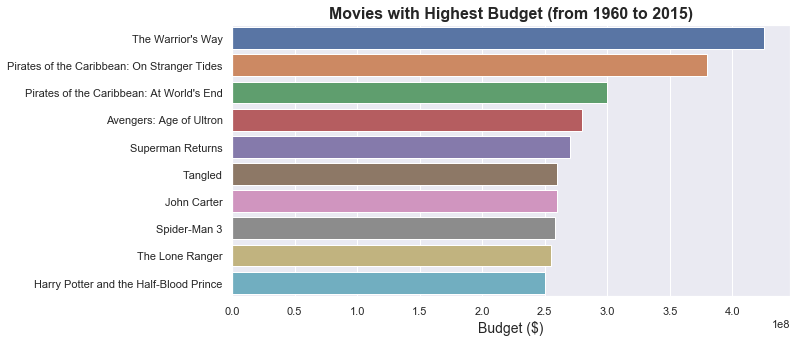

In [18]:
# Take a look at the top-ten budget
df_toptenbudget = df.sort_values(by='budget', ascending=False).head(10)

# Plot the results.
plt.figure(figsize=(10,5))
sns.barplot(x='budget', y='original_title', data=df_toptenbudget)
plt.title('Movies with Highest Budget (from 1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Budget ($)', fontsize=14)
plt.ylabel('', fontsize=14);

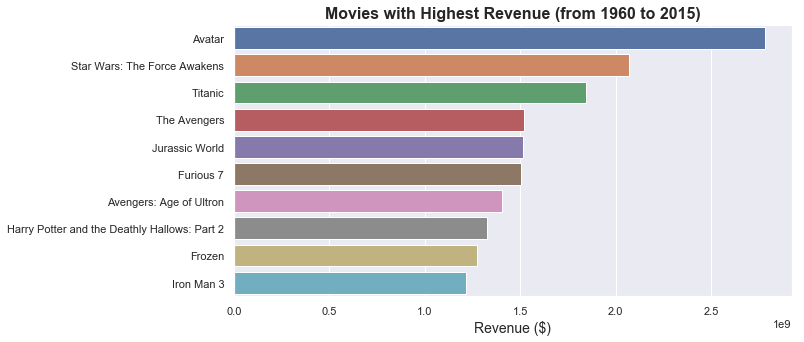

In [19]:
# Take a look at the top-ten revenue
df_toptenrevenue = df.sort_values(by='revenue', ascending=False).head(10)

# Plot the results.
plt.figure(figsize=(10,5))
sns.barplot(x='revenue', y='original_title', data=df_toptenrevenue)
plt.title('Movies with Highest Revenue (from 1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Revenue ($)', fontsize=14)
plt.ylabel('', fontsize=14);

> From the plots of the budget and revenue, we can see that most of the movies that are in the top ten in terms of budget, may not necessarily be in the top ten in terms of revenue. i.e. The Warrior's Way, both Pirates of the Carribean, Superman Returns, Tangled, John Carter, Spider-Man 3, The Lone Ranger, Harry Potter and the Half-Blood Prince.

In [20]:
# Next, we take a look at the profit. Create a new column 'profit'.
df['profit'] = df['revenue'] - df['budget']

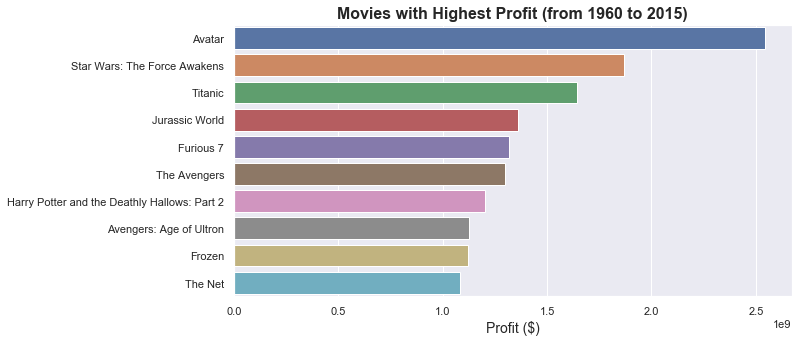

In [21]:
# Create a new dataframe where we sort the profit.
df_toptenprofit = df.sort_values(by='profit', ascending=False).head(10)

# Plot the results.
plt.figure(figsize=(10,5))
sns.barplot(x='profit', y='original_title', data=df_toptenprofit)
plt.title('Movies with Highest Profit (from 1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Profit ($)', fontsize=14)
plt.ylabel('', fontsize=14);

In [22]:
# We take a look at the mean runtime of the Top Ten Profit Movies, and compare it to the overall mean.
df_toptenmeanruntime = df_toptenprofit['runtime'].mean()
print('The mean runtime of the Top Ten Movies is', df_toptenmeanruntime, 'minutes.')
print('The mean runtime of all the movies is', df['runtime'].mean(), 'minutes.')

The mean runtime of the Top Ten Movies is 138.3 minutes.
The mean runtime of all the movies is 109.22029060716139 minutes.


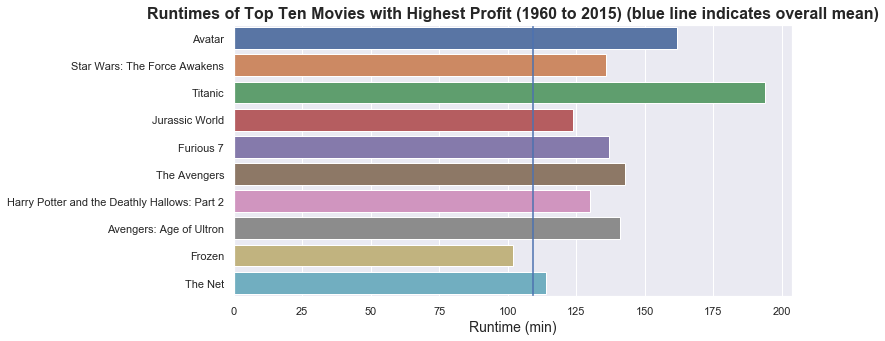

In [23]:
# Plot the runtime of the Top Ten Profit movies.
plt.figure(figsize=(10,5))
sns.barplot(x='runtime', y='original_title', data=df_toptenprofit)
plt.axvline(x=df['runtime'].mean())
plt.title('Runtimes of Top Ten Movies with Highest Profit (1960 to 2015) (blue line indicates overall mean)', fontsize=16, weight='bold')
plt.xlabel('Runtime (min)', fontsize=14)
plt.ylabel('', fontsize=14);

> Just for comparison, let us also take a look at the Bottom Ten Profit-Making Movies.

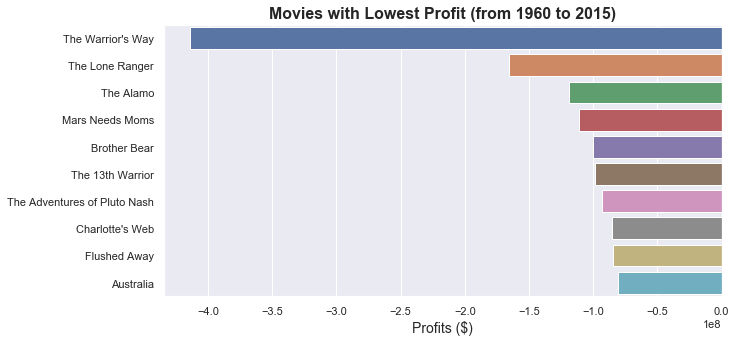

In [24]:
# Plot the runtime of the Bottom Ten Profit movies.
df_bottomtenprofit = df.sort_values(by='profit', ascending=True).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='profit', y='original_title', data=df_bottomtenprofit)
plt.title('Movies with Lowest Profit (from 1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Profits ($)', fontsize=14)
plt.ylabel('', fontsize=14);

> The barplot shows that these movies are making losses instead of profits.

In [25]:
# Mean runtime of the Bottom Ten Movies
df_bottomtenmeanruntime = df_bottomtenprofit['runtime'].mean()
print('The mean runtime of the Bottom Ten Movies is', df_bottomtenmeanruntime, 'minutes.')
print('The mean runtime of all the movies is', df['runtime'].mean(), 'minutes.')

The mean runtime of the Bottom Ten Movies is 110.3 minutes.
The mean runtime of all the movies is 109.22029060716139 minutes.


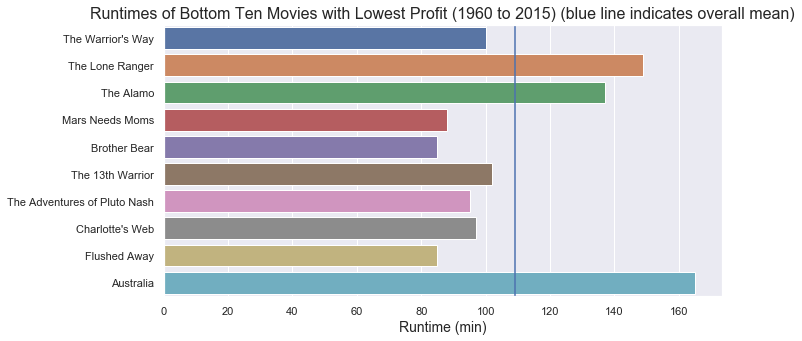

In [26]:
# Plot the runtime of the Bottom Ten Profit movies.
plt.figure(figsize=(10,5))
sns.barplot(x='runtime', y='original_title', data=df_bottomtenprofit)
plt.axvline(x=df['runtime'].mean())
plt.title('Runtimes of Bottom Ten Movies with Lowest Profit (1960 to 2015) (blue line indicates overall mean)', fontsize=16)
plt.xlabel('Runtime (min)', fontsize=14)
plt.ylabel('', fontsize=14);

> With the exception of three movies (The Lone Ranger, The Alamo and Australia), the runtimes of the movies with the lowest profits are all below the mean runtimes.

> How strong is the correlation between budget and profit?

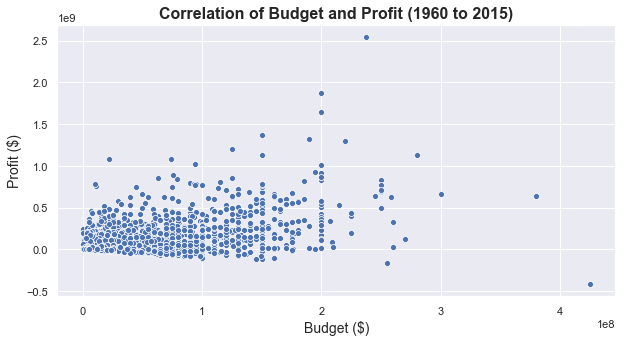

In [27]:
correlation_budget_profit = df[['budget', 'profit']]

plt.figure(figsize=(10,5))
sns.scatterplot(x='budget', y='profit', data=correlation_budget_profit)
plt.title('Correlation of Budget and Profit (1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Budget ($)', fontsize=14)
plt.ylabel('Profit ($)', fontsize=14);

In [28]:
df['profit'].corr(df['budget'])
print('The correlation of profit and budget is {}'.format(df['profit'].corr(df['budget'])))

The correlation of profit and budget is 0.5268176539924019


> The above results show a relatively weak correlation. Putting in more budget doesn't necessarily correlate to more profit.

> How strong is the correlation between revenue and profit?

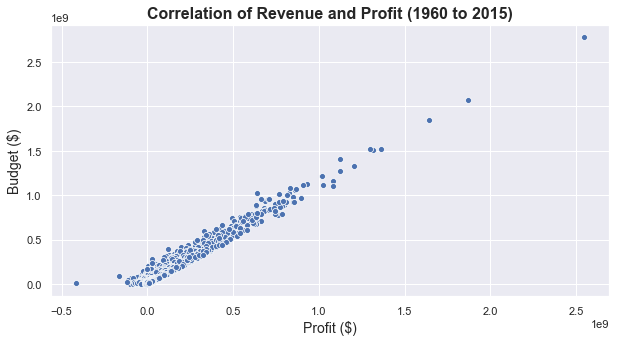

In [29]:
correlation_revenue_profit = df[['revenue', 'profit']]

plt.figure(figsize=(10,5))
sns.scatterplot(x='profit', y='revenue', data=correlation_revenue_profit)
plt.title('Correlation of Revenue and Profit (1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Profit ($)', fontsize=14)
plt.ylabel('Budget ($)', fontsize=14);

In [30]:
df['profit'].corr(df['revenue'])
print('The correlation of profit and revenue is {}'.format(df['profit'].corr(df['revenue'])))

The correlation of profit and revenue is 0.9791333955736254


> This shows a very strong correlation. More revenue usually correlates to more profit (which makes sense).

### Research Question 2: What is the 'sweet spot' for the length of a movie in terms of profit and popularity? i.e. is there any correlation between the runtime and the profit/popularity?

> We take a look at the distribution of runtime for the dataframe.

In [31]:
#df['runtime'].fillna(df['runtime'].mean())
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

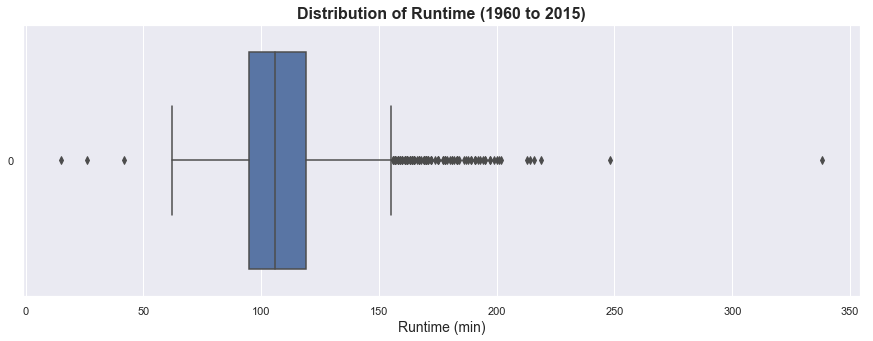

In [32]:
# Plot a boxplot.
plt.figure(figsize=(15,5))
sns.boxplot(data=df['runtime'], orient='h')
plt.title('Distribution of Runtime (1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Runtime (min)', fontsize=14);

> The median of the runtime is 106 min. The inter-quartile range is from 95 min (25%) to 119 min (75%).

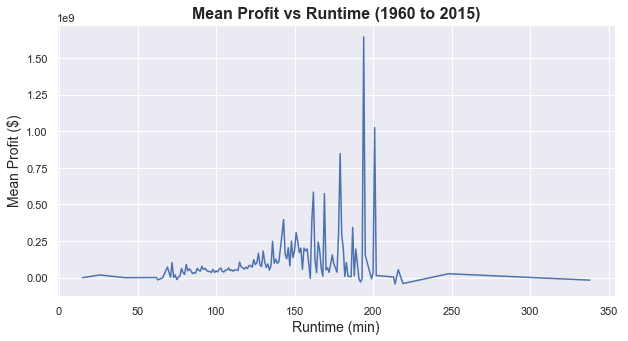

In [33]:
df_runtime_profit = df.groupby('runtime')['profit'].mean()

# Plot a lineplot.
plt.figure(figsize=(10,5))
sns.lineplot(data=df_runtime_profit)
plt.title('Mean Profit vs Runtime (1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Runtime (min)', fontsize=14)
plt.ylabel('Mean Profit ($)', fontsize=14);

>Movies with runtime approximately 125 to 200 minutes tend to have higher profits. This is in line with the above-mentioned results achieved for our "Top Ten Profit-Making Movies", where the mean runtime for the top ten movies was 138 minutes.

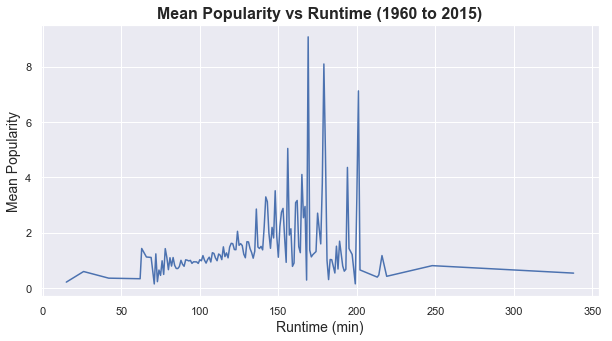

In [34]:
df_runtime_popularity = df.groupby('runtime')['popularity'].mean()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_runtime_popularity)
plt.title('Mean Popularity vs Runtime (1960 to 2015)', fontsize=16, weight='bold')
plt.xlabel('Runtime (min)', fontsize=14)
plt.ylabel('Mean Popularity', fontsize=14);

>Movies with runtime approximately 125 to 200 minutes tend to have higher popularity. This makes sense as most people will not like to see a movie that is too long in runtime.

### Research Question 3: What are the months of the year that have the highest profits? Are there "good months" to release movies to maximise profits?

> We take a look at the mean profit for the movies from 1960 to 2015.

In [35]:
df['profit'].mean()

70482919.14322782

> The mean profit for the movies from 1960 to 2015 is about \\$70M.

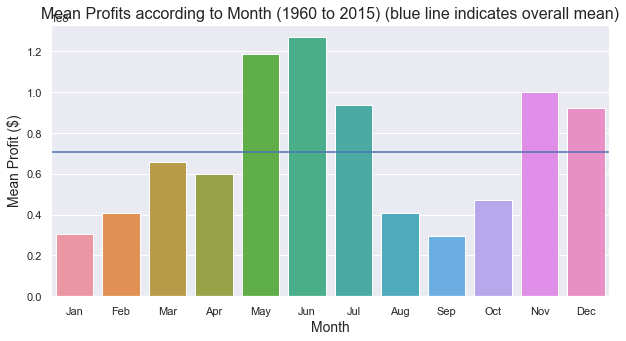

In [36]:
df['month'] = df['release_date'].dt.month
df_month_profit = df.groupby('month', as_index=False).mean()

plt.figure(figsize=(10,5))
sns.barplot(x='month', y='profit', data=df_month_profit)
plt.title('Mean Profits according to Month (1960 to 2015) (blue line indicates overall mean)', fontsize=16)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean Profit ($)', fontsize=14)
plt.axhline(y=df['profit'].mean());
#plt.ticklabel_format(style='plain', axis='y');

> The "good months" to release movies are: (1) May to Jul period, and (2) Nov to Dec period. i.e. the holiday seasons. The profits for the remaining months are below the overall mean i.e. these are not very ideal months to release movies.

### Research Question 4: What are the top genres/cast/director and other traits for the most popular movies?

> We first define that popular movies are movies that have achieved popularity scores that belong to the top 75% quantile.

In [37]:
df['popularity'].describe()

count    3854.000000
mean        1.191554
std         1.475162
min         0.001117
25%         0.462368
50%         0.797511
75%         1.368324
max        32.985763
Name: popularity, dtype: float64

In [38]:
df['popularity'].quantile(0.75)

1.368324

> In order to be defined as a "popular movie", a movie has to achieve a popularity score of at least 1.368324.

In [39]:
df_popularity = df[df['popularity'] >= df['popularity'].quantile(0.75)]

In [40]:
df_popularity.shape

(964, 14)

> We see that there are only 964 movies that fall under the "Popular" category that we defined earlier.

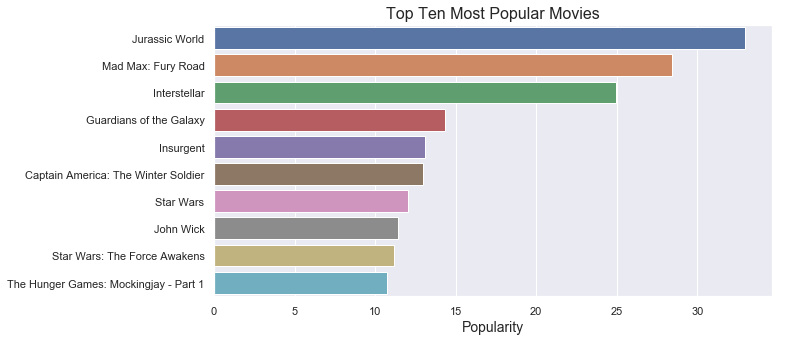

In [41]:
popularmovie = df_popularity.sort_values(by='popularity', ascending=False).head(10)

popularmovie
# Plot the barplot for the most popular movies
plt.figure(figsize=(10,5))
sns.barplot(x=popularmovie.popularity, y=popularmovie.original_title)
plt.title('Top Ten Most Popular Movies', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('', fontsize=14);

Next, we investigate the most popular director, cast and genre.

> Each movie has multiple genres/cast/director listed under the respective columns.
<br>For example, Jurassic World has 'Action', 'Adventure', 'Science Fiction' and 'Thriller' listed under its genres.
<br>For ease of data cleaning, we will split up the individual genres/cast/director and do a count separately. We will write a function to do this.

In [42]:
# Credit to deepak525 for the following function which I paraphrased.
# Reference: https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb

def pdseries_count(column, dataframe):
    pdseries_to_string = dataframe[column].str.cat(sep = '|') # This takes the pdSeries rows and combines them into a long string separated by '|'.
    string_to_pdseries = pd.Series(pdseries_to_string.split('|')) # This creates a new pdSeries from the individual items in the previous string.
    output = string_to_pdseries.value_counts(ascending=False)
    return output

In [43]:
# Most popular director

directorcount = pdseries_count('director', df_popularity)
directorcount = directorcount.head(10)

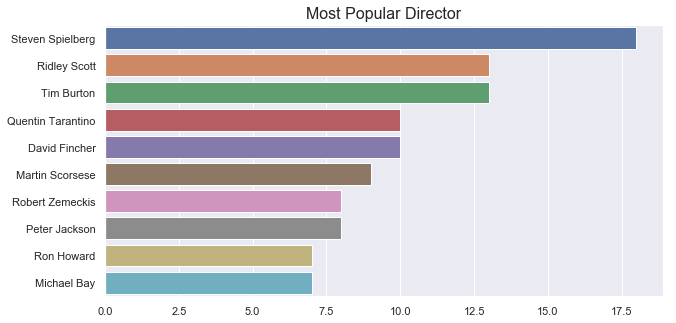

In [44]:
# Plot the barplot for the most popular director
plt.figure(figsize=(10,5))
sns.barplot(x=directorcount.values, y=directorcount.index)
plt.title('Most Popular Director', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14);

> The top three most popular directors are Steven Spielberg, Ridley Scott and Tim Burton.

> Next, we investigate which cast have acted the most in the most popular movies.

In [45]:
# Most popular cast

castcount = pdseries_count('cast', df_popularity)
castcount = castcount.head(10)

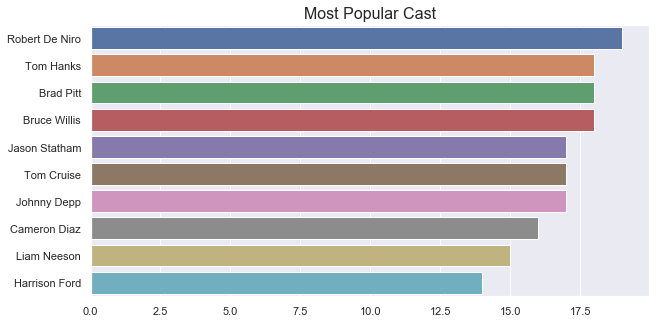

In [46]:
# Plot the barplot for the most popular cast
plt.figure(figsize=(10,5))
sns.barplot(x=castcount.values, y=castcount.index)
plt.title('Most Popular Cast', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14);

> The top three most popular cast are Robert De Niro, Brad Pitt and Tom Hanks.

In [47]:
# Most popular genres

genrecount = pdseries_count('genres', df_popularity)
genrecount = genrecount.head(10)

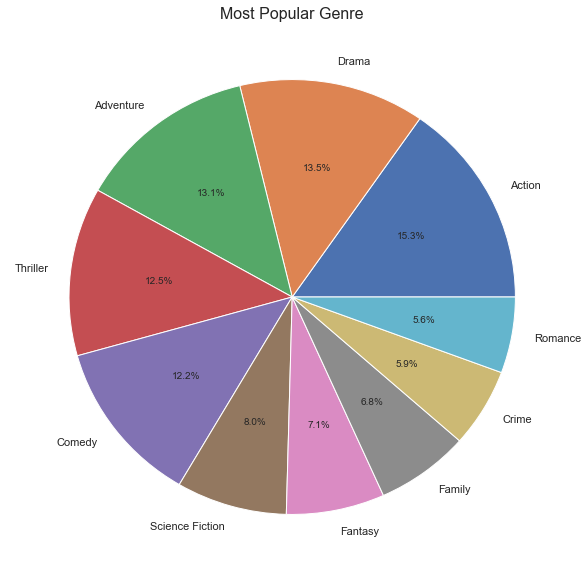

In [48]:
# Plot the pie chart for the most popular genres
genrecount.plot(kind='pie', figsize=(10,10), autopct='%.1f%%')
plt.title('Most Popular Genre', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14);

> The top three most popular genres are Action, Drama and Adventure.

<a id='conclusions'></a>
## Conclusions

### Research Question 1 : What are the top profit-making movies?
- The top three profit-making movies are Avatar, Star Wars: The Force Awakens and Titanic.
- The movies with the highest budgets are not necessarily the ones that bring in the highest revenues.
- The correlation between budget and profit is relatively weak (0.52). More budget doesn't necessarily means that more profits will be generated.

### Research Question 2: Does the runtime of a movie affect its profit and popularity?
- Movies with runtimes approximately 125 to 200 minutes tend to have higher profits and popularity.
- Movies with runtimes less than the mean runtime (109 min) tend to have lower (or even negative) profits and popularity.

### Research Question 3: What are the months of the year that have the highest profits? Are there "good months" to release movies to maximise profits?
- The "good months" to release movies are: (1) May to Jul period, and (2) Nov to Dec period. i.e. the holiday seasons.
- The rest of the months are not as ideal for the release of movies, as their profits are below the overall mean profit.

### Research Question 4 - What are the top directors, cast and genres for the most popular movies?
- The top three most popular directors are Steven Spielberg, Ridley Scott and Tim Burton.
- The top three most popular cast are Robert De Niro, Brad Pitt and Tom Hanks.
- The top three most popular genres are Action, Drama and Adventure.


## Limitations
- Dataset limitations such as missing data. The original dataframe had 10866 entries, which were reduced to 3854 entries after data cleaning. This represents almost a 60% reduction in entries that could otherwise be used in the exploratory data analysis.
- Currency limitations. The budget and revenues are assumed to be in US dollars instead of the local currencies. The USD to local exchange rate is also not accounted for.
- Conclusion limitations. The results are mainly correlation and does not imply causation (i.e. making a movie with the "winning factors" for runtime, cast, genre, etc does not guarantee success (profit) at the box office)


## Credits
- "Deepak525" for the count function which I paraphrased for use in this report. The URL is : https://github.com/deepak525/Investigate_TMDb_Movies/blob/master/investigate_the_TBMb_Dataset.ipynb

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0